In [1]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE


When we use smote adalah as dataset itu tidak seimbang/imbalance. from where we known that dataset is imbalance dari visualisasi data menggunakan seaborn ataupun matplotlib.pyplot, lebih baik menggunakan seaborn karena lebih canggih dan easy

In [2]:
dataset = pd.read_csv(r"C:\Users\user\Documents\machine-learning\Preprocessing\Data\Churn_Modelling.csv")
dataset['Exited'].sample(10)

3084    0
4950    0
6985    0
1748    1
9414    1
6970    0
8540    0
5588    0
5901    0
7091    1
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

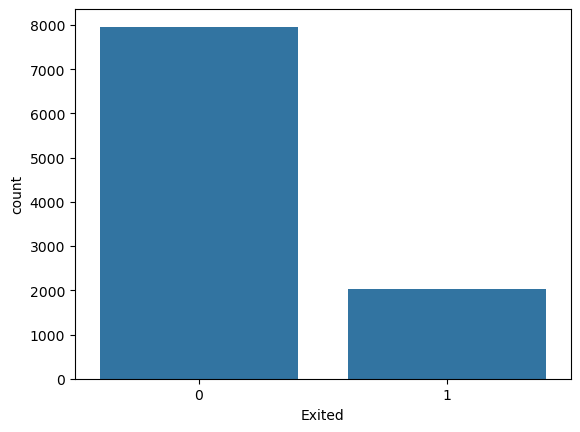

In [3]:
sns.countplot(dataset, x='Exited')

<Axes: xlabel='CreditScore', ylabel='Age'>

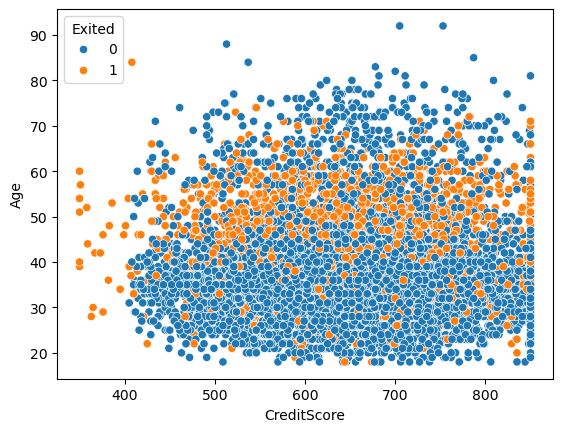

In [4]:
# Before dataset dismote
dataset_example = dataset[['CreditScore', 'Age', 'Exited']]
sns.scatterplot(data=dataset, x='CreditScore', y='Age', hue='Exited')

Prosess data dismote so balance

In [5]:
# jika angka random_state berubah maka akan memperngaruhi result
smote = SMOTE(random_state = None)
X_res, y_res = smote.fit_resample(dataset[['CreditScore', 'Age']], dataset['Exited'])

In [6]:
data_oversampler = pd.DataFrame(X_res, columns=['CreditScore', 'Age'])
data_oversampler['Exited'] = y_res

<Axes: xlabel='Exited', ylabel='count'>

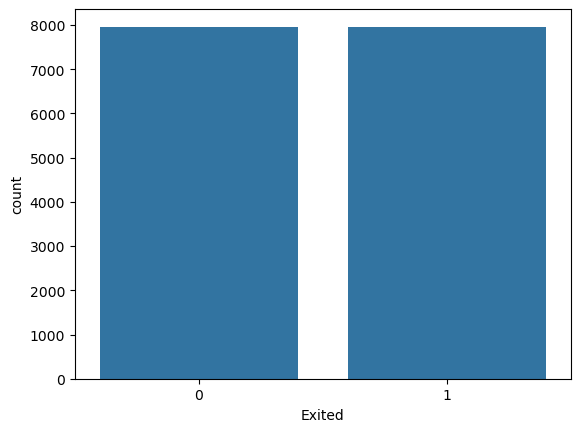

In [7]:
sns.countplot(data=data_oversampler, x='Exited')

In [8]:
data_oversampler['Exited'].sample(10)

8964     0
13229    1
15727    1
5491     1
1600     0
4141     0
994      0
10691    1
15811    1
15101    1
Name: Exited, dtype: int64

<Axes: xlabel='CreditScore', ylabel='Age'>

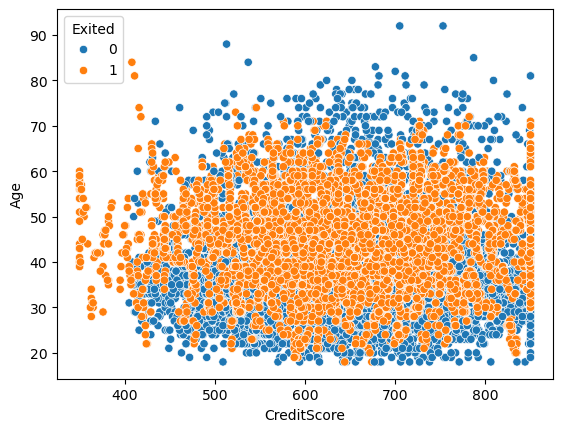

In [9]:
# After dataset di smote
sns.scatterplot(data=data_oversampler, x='CreditScore', y='Age', hue='Exited')

In [10]:
# sns.scatterplot(data=dataset, x='CreditScore', y='Age', hue='HasCrCard')

In [11]:
# sns.countplot(data=dataset, x='HasCrCard')

In [12]:
# smote_Card = SMOTE(random_state=101)
# X, y = smote_Card.fit_resample(dataset[['CreditScore', 'Age']], dataset['HasCrCard'])
# dataset_oversampler = pd.DataFrame(X, columns=['CreditScore', 'Age'])
# dataset_oversampler['HasCrCard'] = y

In [13]:
# sns.countplot(data=dataset_oversampler, x='HasCrCard')

In [14]:
# sns.scatterplot(data=dataset_oversampler, x='CreditScore', y='Age', hue='HasCrCard')

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# membagi/split data  menggunakan lib sklearn (train_test_split)
X_train, X_test, y_train, y_test = train_test_split(dataset_example[['CreditScore', 'Age']], dataset['Exited'], test_size=0.2, stratify=dataset['Exited'], random_state=101)

In [16]:
# melakukan smote pada data yang sudah displit
smote =SMOTE(random_state=101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [17]:
# model memprediksi angka satu dari dataset yang dioversample menggunakan LogisticRegression
# model lebih baik dalam memprediksi angka satu pada dataset
classifer = LogisticRegression()
classifer.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifer.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.73      0.79      1593
           1       0.36      0.60      0.45       407

    accuracy                           0.70      2000
   macro avg       0.62      0.66      0.62      2000
weighted avg       0.77      0.70      0.72      2000



In [18]:
# model memprediksi angka satu dari data yang dioversample menggunakan LogisticRegression
# model lebih baik dalam memprediksi angka satu pada dataset
classifer = LogisticRegression()
classifer.fit(X_res, y_res)
print(classification_report(y_test, classifer.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1593
           1       0.36      0.60      0.45       407

    accuracy                           0.70      2000
   macro avg       0.62      0.66      0.62      2000
weighted avg       0.77      0.70      0.72      2000



In [19]:
# result model memprediksi angka satu dari data yang imbalance menggunakan LogisticRegression
classifer_1 = LogisticRegression()
classifer_1.fit(X_train, y_train)
print(classification_report(y_test, classifer_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.19      0.04      0.07       407

    accuracy                           0.77      2000
   macro avg       0.49      0.50      0.47      2000
weighted avg       0.67      0.77      0.71      2000



# SMOTE-NC

In [28]:
from imblearn.over_sampling import SMOTENC
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Geography', ylabel='count'>

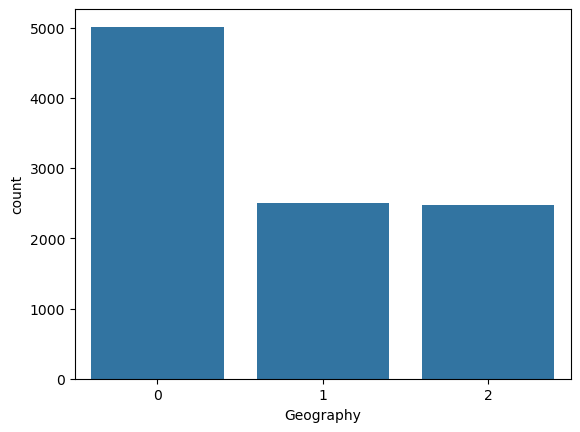

In [43]:
sns.countplot(dataset, x='Geography')

<Axes: xlabel='Gender', ylabel='count'>

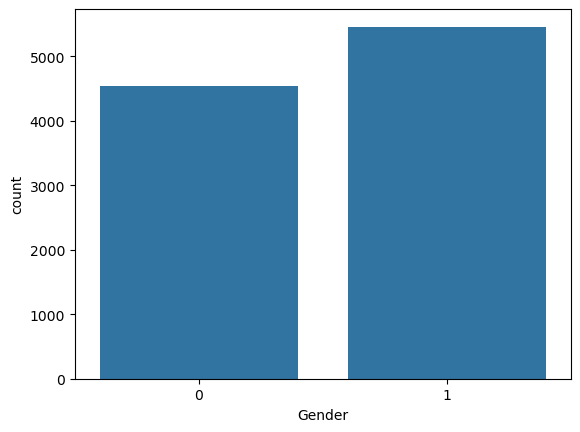

In [40]:
sns.countplot(dataset, x='Gender')

In [29]:
# mengubah kolom kategorikal menjadi angka menggunakan lib sklearn.preprocessing (LabelEncoder)
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
dataset['Geography'] =encode.fit_transform(dataset['Geography'])
dataset['Gender'] = encode.fit_transform(dataset['Gender'])

In [31]:
a = dataset[['CreditScore', 'Age', 'Geography', 'Gender']] # data input/feature
c = dataset['Exited'] # data output/targer

In [ ]:
# tentukan index categorical pada a yaitu 2 = Geography dan 3 = Gender
categorical_features = [2, 3]
# smote NC
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
a_res, c_res = smote_nc.fit_resample(a, c)

In [33]:
dataset_smote_nc = pd.DataFrame(a_res, columns=['CreditScore', 'Age', 'Geography', 'Gender'])
dataset_smote_nc['Exited'] = c_res

<Axes: xlabel='Geography', ylabel='count'>

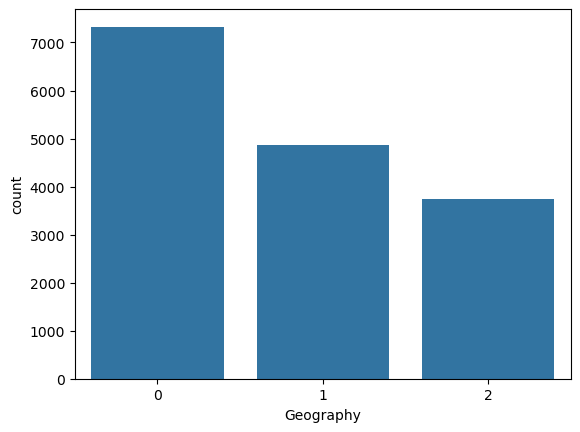

In [42]:
sns.countplot(dataset_smote_nc, x='Geography')

<Axes: xlabel='Gender', ylabel='count'>

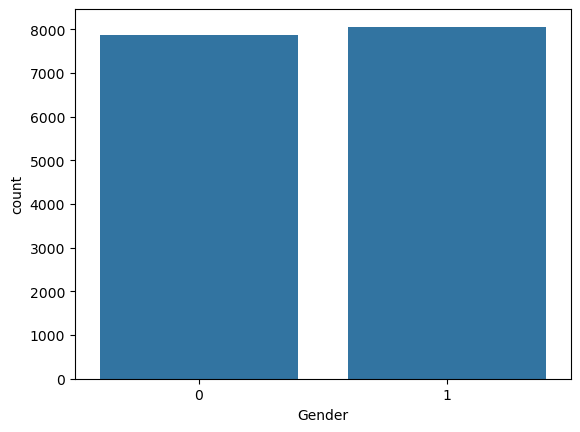

In [41]:
sns.countplot(dataset_smote_nc, x='Gender')

<Axes: xlabel='CreditScore', ylabel='Age'>

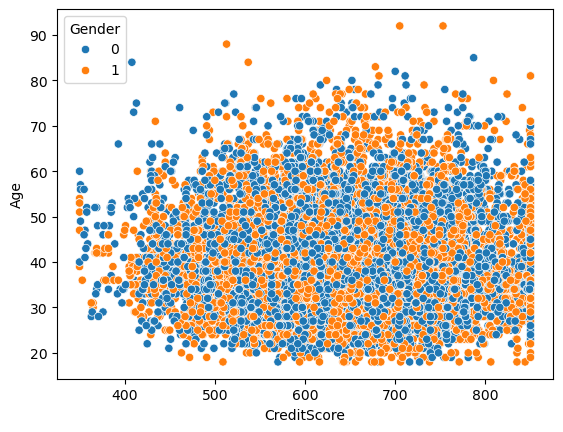

In [38]:
sns.scatterplot(dataset_smote_nc, x='CreditScore', y='Age', hue='Gender')

In [45]:
print("Sebelum SMOTE-NC:\n", c.value_counts())
print("Sesudah SMOTE-NC:\n", dataset_smote_nc['Exited'].value_counts())

Sebelum SMOTE-NC:
 Exited
0    7963
1    2037
Name: count, dtype: int64
Sesudah SMOTE-NC:
 Exited
1    7963
0    7963
Name: count, dtype: int64
